In [1]:
import os
import glob

In [2]:
imgdir = '/Users/andrewrenninger/Desktop/R/git/sensing/sensing/data/2750' 
images = [] 

for file in glob.glob(imgdir + os.sep + "*" + os.sep + "*.jpg"):
  images.append(file)

len(images)

27000

In [3]:
%matplotlib inline

from skimage.io import imread_collection
from skimage.io import imread

from skimage.color import rgb2gray

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import re

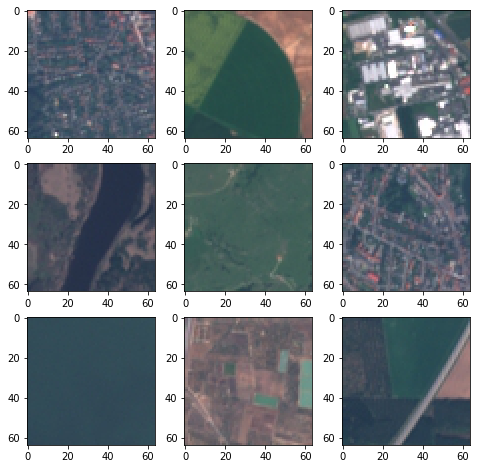

In [4]:
idx = np.random.randint(0, 27001, 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    for j in np.arange(0, 3):
      slot = i*3+j
      path = images[idx[slot]]
      img = imread(open(path, "rb"))
      axs[i, j].imshow(img)
        
plt.show()

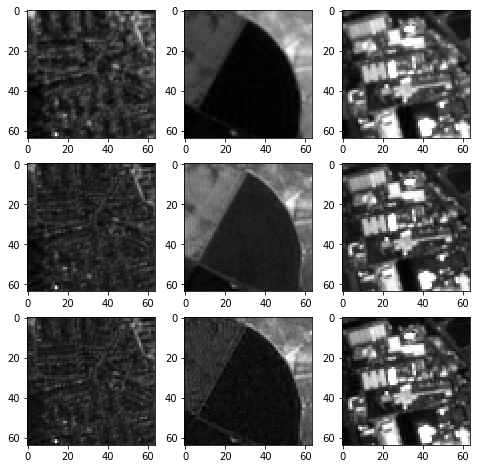

In [5]:
fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    slot = i
    path = images[idx[slot]]
    for j in np.arange(0, 3):
      img = imread(open(path, "rb"))
      axs[j, i].imshow(img[:,:, j], cmap = 'gray')
        
plt.show()

In [6]:
def vectorize(img):
    mat = imread(open(img, "rb"))
    bnw = rgb2gray(mat)
    out = bnw.squeeze().flatten()
    return out

In [224]:
series = pd.Series(images, name = "paths")
labels = series.str.split("/").str.get(10)

labels = pd.factorize(labels)

y = np.array(labels[0])

In [8]:
mat = imread(open(path, "rb"))
bnw = rgb2gray(mat)
out = bnw.squeeze().flatten()

In [9]:
mat = np.zeros([y.shape[0], out.shape[0]])

for i, tmp in series.to_frame().iterrows():
    mat[i] = vectorize(tmp.paths)

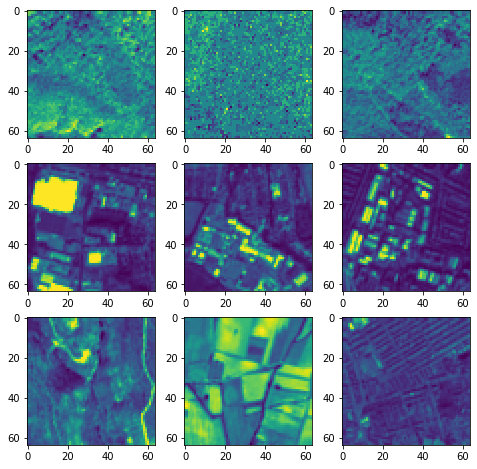

In [10]:
idx = np.random.randint(0, 27001, 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    for j in np.arange(0, 3):
      num = i*3+j
      dat = mat[idx[num]].reshape([64, 64])
      axs[i, j].imshow(dat)
        
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(mat, y, test_size = 0.5, random_state = 42)

In [13]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [14]:
num_classes = len(labels[1])

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [80]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, Conv2D, MaxPooling2D

EPOCH = 20
BATCH = int(y_train.shape[0] / EPOCH) 

In [19]:
model_one = Sequential()
model_one.add(Dense(num_classes, activation = 'relu', input_shape = (4096,)))

model_one.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                40970     
Total params: 40,970
Trainable params: 40,970
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_one.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

history_one = model_one.fit(X_train, y_train,
                            epochs = EPOCH,
                            batch_size = BATCH,
                            validation_data = (X_test, y_test))

Train on 13500 samples, validate on 13500 samples
Epoch 1/20
13500/13500 [==============================] - 0s 34us/step - loss: 9.9478 - accuracy: 0.1056 - val_loss: 10.1057 - val_accuracy: 0.1027
Epoch 2/20
13500/13500 [==============================] - 0s 26us/step - loss: 10.1252 - accuracy: 0.1010 - val_loss: 10.1057 - val_accuracy: 0.1106
Epoch 3/20
13500/13500 [==============================] - 0s 26us/step - loss: 10.1253 - accuracy: 0.1051 - val_loss: 10.1054 - val_accuracy: 0.1109
Epoch 4/20
13500/13500 [==============================] - 0s 25us/step - loss: 10.1248 - accuracy: 0.1061 - val_loss: 10.1087 - val_accuracy: 0.1037
Epoch 5/20
13500/13500 [==============================] - 0s 25us/step - loss: 10.1255 - accuracy: 0.1120 - val_loss: 10.1059 - val_accuracy: 0.1096
Epoch 6/20
13500/13500 [==============================] - 0s 27us/step - loss: 10.1247 - accuracy: 0.1159 - val_loss: 10.1062 - val_accuracy: 0.1096
Epoch 7/20
13500/13500 [==============================] -

In [23]:
score_one = model_one.evaluate(X_test, y_test, verbose = 0)

print("Test loss: ", score_one[0])
print("Test accuracy: ", score_one[1])

Test loss:  10.103894555833605
Test accuracy:  0.1111111119389534


In [21]:
model_two = Sequential()
model_two.add(Dense(500, activation = 'relu', input_shape = (4096,)))
model_two.add(Dense(num_classes, activation = 'relu'))

model_two.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 500)               2048500   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 2,053,510
Trainable params: 2,053,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_two.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

history_two = model_two.fit(X_train, y_train,
                            epochs = EPOCH,
                            batch_size = BATCH,
                            validation_data = (X_test, y_test))

Train on 13500 samples, validate on 13500 samples
Epoch 1/20
13500/13500 [==============================] - 1s 71us/step - loss: 6.6594 - accuracy: 0.0993 - val_loss: 4.9147 - val_accuracy: 0.1120
Epoch 2/20
13500/13500 [==============================] - 1s 66us/step - loss: 4.9805 - accuracy: 0.1102 - val_loss: 4.8960 - val_accuracy: 0.1120
Epoch 3/20
13500/13500 [==============================] - 1s 68us/step - loss: 4.9707 - accuracy: 0.1078 - val_loss: 4.8932 - val_accuracy: 0.1120
Epoch 4/20
13500/13500 [==============================] - 1s 68us/step - loss: 4.9695 - accuracy: 0.1069 - val_loss: 4.8935 - val_accuracy: 0.1088
Epoch 5/20
13500/13500 [==============================] - 1s 66us/step - loss: 4.9683 - accuracy: 0.1144 - val_loss: 4.8929 - val_accuracy: 0.1096
Epoch 6/20
13500/13500 [==============================] - 1s 66us/step - loss: 4.9656 - accuracy: 0.1207 - val_loss: 4.8874 - val_accuracy: 0.1151
Epoch 7/20
13500/13500 [==============================] - 1s 68us/st

In [25]:
score_two = model_two.evaluate(X_test, y_test, verbose = 0)

print("Test loss: ", score_two[0])
print("Test accuracy: ", score_two[1])

Test loss:  4.826379513634576
Test accuracy:  0.17140740156173706


In [28]:
model_tre = Sequential()
model_tre.add(Dense(500, activation = 'relu', input_shape = (4096,)))
model_tre.add(Dropout(0.3))
model_tre.add(Dense(300, activation = 'relu'))
model_tre.add(Dropout(0.3))
model_tre.add(Dense(100, activation = 'relu'))
model_tre.add(Dropout(0.3))
model_tre.add(Dense(num_classes, activation = 'relu'))

model_tre.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 500)               2048500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [29]:
model_tre.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_tre = model_tre.fit(X_train, y_train,
                            epochs = EPOCH,
                            batch_size = BATCH,
                            validation_data = (X_test, y_test))

Train on 13500 samples, validate on 13500 samples
Epoch 1/20
13500/13500 [==============================] - 1s 95us/step - loss: 2.9214 - accuracy: 0.1015 - val_loss: 2.2986 - val_accuracy: 0.1143
Epoch 2/20
13500/13500 [==============================] - 1s 77us/step - loss: 2.3562 - accuracy: 0.1050 - val_loss: 2.3036 - val_accuracy: 0.1092
Epoch 3/20
13500/13500 [==============================] - 1s 77us/step - loss: 2.3382 - accuracy: 0.1032 - val_loss: 2.2971 - val_accuracy: 0.1096
Epoch 4/20
13500/13500 [==============================] - 1s 75us/step - loss: 2.3277 - accuracy: 0.1073 - val_loss: 2.2941 - val_accuracy: 0.1100
Epoch 5/20
13500/13500 [==============================] - 1s 76us/step - loss: 2.3216 - accuracy: 0.1095 - val_loss: 2.2955 - val_accuracy: 0.1096
Epoch 6/20
13500/13500 [==============================] - 1s 74us/step - loss: 2.3155 - accuracy: 0.1068 - val_loss: 2.2907 - val_accuracy: 0.1092
Epoch 7/20
13500/13500 [==============================] - 1s 82us/st

In [30]:
score_tre = model_tre.evaluate(X_test, y_test, verbose = 0)

print("Test loss: ", score_tre[0])
print("Test accuracy: ", score_tre[1])

Test loss:  2.0502319268827085
Test accuracy:  0.21111111342906952


In [36]:
epochs = range(1, EPOCH + 1)

one_val_loss = history_one.history['val_loss']
two_val_loss = history_two.history['val_loss']
tre_val_loss = history_tre.history['val_loss']

one_train_loss = history_one.history['loss']
two_train_loss = history_two.history['loss']
tre_train_loss = history_tre.history['loss']

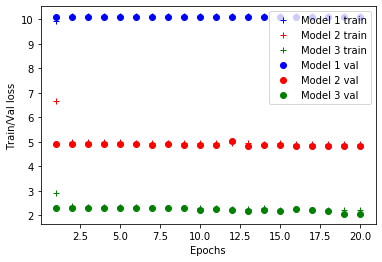

In [37]:
plt.plot(epochs, one_train_loss, 'b+', label = 'Model 1 train')
plt.plot(epochs, two_train_loss, 'r+', label = 'Model 2 train')
plt.plot(epochs, tre_train_loss, 'g+', label = 'Model 3 train')
plt.plot(epochs, one_val_loss, 'bo', label = 'Model 1 val')
plt.plot(epochs, two_val_loss, 'ro', label = 'Model 2 val')
plt.plot(epochs, tre_val_loss, 'go', label = 'Model 3 val')

plt.xlabel('Epochs')
plt.ylabel('Train/Val loss')
plt.legend()

plt.show()

In [38]:
def colorize(img):
    out = imread(open(img, "rb"))
    return out

In [39]:
test = imread(open(path, "rb"))

In [67]:
mat = np.zeros([y.shape[0], test.shape[0], test.shape[1], test.shape[2]])

for i, tmp in series.to_frame().iterrows():
    mat[i] = colorize(tmp.paths)
    
mat = mat.astype('uint8')

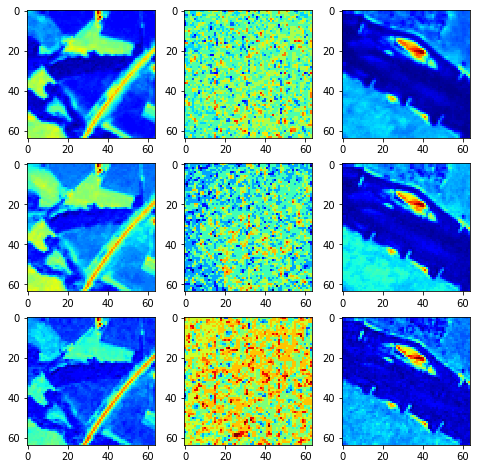

In [70]:
idx = np.random.randint(0, 27001, 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    slot = i
    for j in np.arange(0, 3):
        img = mat[idx[slot]]
        axs[j, i].imshow(img[:,:, j], cmap = 'jet')
        
plt.show()

In [116]:
X = mat / 255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42)

num_classes = len(labels[1])

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [117]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = mat.shape[1:]))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [118]:
from keras.optimizers import SGD

In [119]:
sgd = SGD(lr = 0.01, momentum = 0.9, nesterov = True)

model.compile(loss = 'categorical_crossentropy',
              optimizer = sgd,
              metrics = ['accuracy'])

In [120]:
model.fit(X_train, y_train,
          epochs = EPOCH,
          batch_size = BATCH,
          validation_data = (X_test, y_test))

Train on 13500 samples, validate on 13500 samples
Epoch 1/20
13500/13500 [==============================] - 48s 4ms/step - loss: 2.2292 - accuracy: 0.1421 - val_loss: 2.1011 - val_accuracy: 0.2196
Epoch 2/20
13500/13500 [==============================] - 46s 3ms/step - loss: 2.0574 - accuracy: 0.2320 - val_loss: 1.8994 - val_accuracy: 0.3140
Epoch 3/20
13500/13500 [==============================] - 46s 3ms/step - loss: 1.8723 - accuracy: 0.2735 - val_loss: 1.7505 - val_accuracy: 0.3376
Epoch 4/20
13500/13500 [==============================] - 46s 3ms/step - loss: 1.7833 - accuracy: 0.3146 - val_loss: 1.7777 - val_accuracy: 0.3236
Epoch 5/20
13500/13500 [==============================] - 46s 3ms/step - loss: 1.7571 - accuracy: 0.3354 - val_loss: 1.6841 - val_accuracy: 0.3650
Epoch 6/20
13500/13500 [==============================] - 65s 5ms/step - loss: 1.6963 - accuracy: 0.3708 - val_loss: 1.5932 - val_accuracy: 0.4342
Epoch 7/20
13500/13500 [==============================] - 47s 4ms/st

In [121]:
score = model.evaluate(X_test, y_test, verbose = 0)

print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  1.1643281344131187
Test accuracy:  0.5946666598320007


In [140]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = mat.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) 
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation = 'softmax'))

In [141]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = sgd,
              metrics = ['accuracy'])

In [142]:
model.fit(X_train, y_train,
          epochs = EPOCH,
          batch_size = BATCH,
          validation_data = (X_test, y_test))

Train on 13500 samples, validate on 13500 samples
Epoch 1/20
13500/13500 [==============================] - 24s 2ms/step - loss: 2.2685 - accuracy: 0.1093 - val_loss: 2.2545 - val_accuracy: 0.2082
Epoch 2/20
13500/13500 [==============================] - 23s 2ms/step - loss: 2.1412 - accuracy: 0.2147 - val_loss: 2.1632 - val_accuracy: 0.2015
Epoch 3/20
13500/13500 [==============================] - 24s 2ms/step - loss: 2.0712 - accuracy: 0.2445 - val_loss: 2.1120 - val_accuracy: 0.2063
Epoch 4/20
13500/13500 [==============================] - 24s 2ms/step - loss: 2.0120 - accuracy: 0.2634 - val_loss: 2.0425 - val_accuracy: 0.2420
Epoch 5/20
13500/13500 [==============================] - 24s 2ms/step - loss: 1.9193 - accuracy: 0.3048 - val_loss: 1.9334 - val_accuracy: 0.2563
Epoch 6/20
13500/13500 [==============================] - 24s 2ms/step - loss: 1.9411 - accuracy: 0.2780 - val_loss: 2.3307 - val_accuracy: 0.1265
Epoch 7/20
13500/13500 [==============================] - 23s 2ms/st

In [144]:
score = model.evaluate(X_test, y_test, verbose = 0)

print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  1.3860046605004204
Test accuracy:  0.4416296184062958


In [225]:
y_real = np.argmax(y_test, axis = 1)
y_pred = model.predict_classes(X_test)

score = y_real == y_pred

scoreboard = pd.DataFrame({"real": y_real, "score": score}).groupby(["real"], as_index = False).agg({"score": ['count', 'sum']})
scoreboard.score.assign(rate = df['sum'] / df['count']).assign(label = labels[1])

,count,sum,rate,label
0,1479,1436.0,0.970926,Forest
1,1278,465.0,0.363850,River
2,1251,188.0,0.150280,Highway
3,1521,446.0,0.293228,AnnualCrop
4,1474,183.0,0.124152,SeaLake
5,1543,1326.0,0.859365,HerbaceousVegetation
6,1229,645.0,0.524817,Industrial
7,1512,983.0,0.650132,Residential
8,1235,72.0,0.058300,PermanentCrop
9,978,218.0,0.222904,Pasture


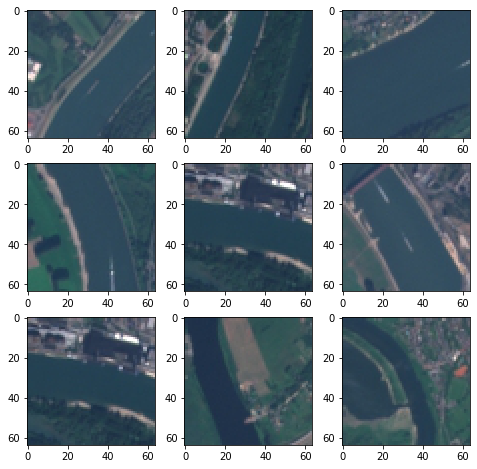

In [235]:
rivers = X_test[score & (y_real == 1)]

idx = np.random.randint(0, len(rivers), 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    for j in np.arange(0, 3):
      slot = i*3+j
      img = rivers[idx[slot]]
      axs[i, j].imshow(img)
        
plt.show()

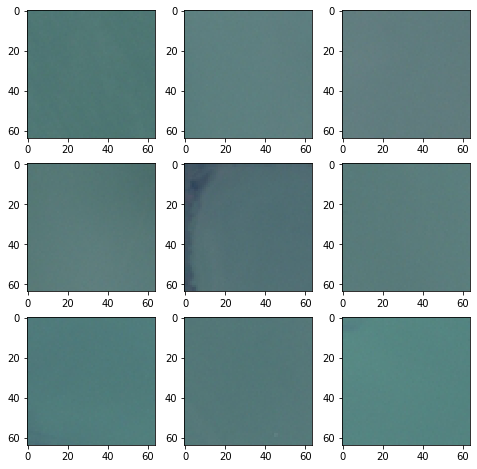

In [237]:
lakes = X_test[score & (y_real == 4)]

idx = np.random.randint(0, len(lakes), 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    for j in np.arange(0, 3):
      slot = i*3+j
      img = lakes[idx[slot]]
      axs[i, j].imshow(img)
        
plt.show()

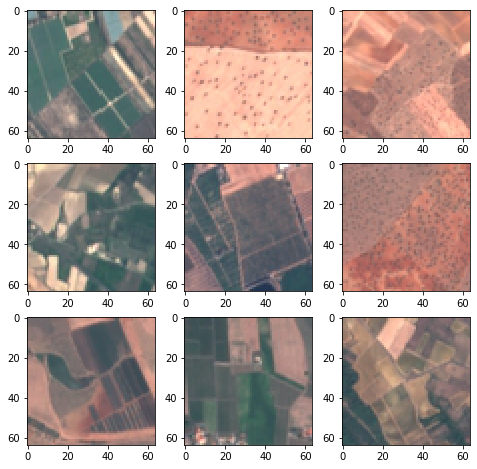

In [239]:
crops = X_test[score & (y_real == 8)]

idx = np.random.randint(0, len(crops), 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    for j in np.arange(0, 3):
      slot = i*3+j
      img = crops[idx[slot]]
      axs[i, j].imshow(img)
        
plt.show()